# Affect of Marijuana legalization on crime rates

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*

Evaluate the impact of marijuana legalization on other areas of crime through comparative analysis to establish/refute correlation.

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
Does marijuana legalization lead to an increase in other areas of criminality?

## What would an answer look like?
*What is your hypothesized answer to your question?*
I suspect there will be some increases in other areas such as impaired driving. I do not have a strong inclination towards the degree it is impacted.

## Data Sources
*What 3 data sources have you identified for this project?*
[Seattle Crime stats](https://www.kaggle.com/datasets/city-of-seattle/seattle-crime-stats)
[Denver Crime stats](https://www.kaggle.com/datasets/paultimothymooney/denver-crime-data/data)
[Kansas City Crime](https://www.kaggle.com/datasets/riteshkadakoti/crime-dataset-kansas)

*How are you going to relate these datasets?*
My working plan to compare 2 large cities where marijuana was first legalized (2012) for recreational use. I plan compare pre and post legalization crime trends. Then further compare/contrast that with a large city that had not (until this year) legalized recreational use. I am still ruminating on the mechanics of how to best do that.

## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

In [29]:
# Start your code here
# Not sure what the expectation is for this block
import numpy as np
import pandas as pd
import datetime
from scipy.stats import trim_mean

# Configure pandas to display 500 rows; otherwise it will truncate the output
pd.set_option('display.max_rows', 500)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use("bmh")

denver_crime_df = pd.read_csv('data/denver_crime.csv')
kc_crime_df = pd.read_csv('data/KCcrime2010To2018.csv', low_memory=False)
seattle01_crime_df = pd.read_csv('data/seattle-crime-stats-by-1990-census-tract-1996-2007.csv')
seattle02_crime_df = pd.read_csv('data/seattle-crime-stats-by-police-precinct-2008-present.csv')

denver_crime_df.head()
kc_crime_df.head()
seattle01_crime_df.head()
seattle02_crime_df.head()


,Police Beat,CRIME_TYPE,CRIME_DESCRIPTION,STAT_VALUE,REPORT_DATE,Sector,Precinct,Row_Value_ID
0,R2,Rape,Rape,1,2014-04-30T00:00:00.000,R,SE,27092
1,K2,Assault,Assault,5,2014-04-30T00:00:00.000,K,W,26506
2,M2,Homicide,Homicide,1,2014-04-30T00:00:00.000,M,W,27567
3,C3,Robbery,Robbery,2,2014-04-30T00:00:00.000,C,E,26225
4,E2,Motor Vehicle Theft,"Vehicle Theft is theft of a car, truck, motorc...",7,2014-04-30T00:00:00.000,E,E,26368


### Exploratory Data Analysis

Data visualizations to evaluate the data in order to form conclusions about whether marijuana legalization had a tangential impact on other aspects of crime.
I am paying particular attention to the 2-3 year period before and after legalization.

In [30]:
# Get the shapes of the data
display(denver_crime_df.shape)
display(seattle01_crime_df.shape)
display(seattle02_crime_df.shape)
display(kc_crime_df.shape)

(386865, 20)

(14268, 4)

(27125, 8)

(621281, 27)

In [31]:
# Look at the columns and compare the presentation of the data
display(denver_crime_df.info())
display(seattle01_crime_df.info())
display(seattle02_crime_df.info())
display(kc_crime_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386865 entries, 0 to 386864
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   incident_id             386865 non-null  int64  
 1   offense_id              386865 non-null  int64  
 2   offense_code            386865 non-null  int64  
 3   offense_code_extension  386865 non-null  int64  
 4   offense_type_id         386865 non-null  object 
 5   offense_category_id     386865 non-null  object 
 6   first_occurrence_date   386865 non-null  object 
 7   last_occurrence_date    211309 non-null  object 
 8   reported_date           386865 non-null  object 
 9   incident_address        371362 non-null  object 
 10  geo_x                   371362 non-null  float64
 11  geo_y                   371362 non-null  float64
 12  geo_lon                 371096 non-null  float64
 13  geo_lat                 371096 non-null  float64
 14  district_id         

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14268 entries, 0 to 14267
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Report_Year        14268 non-null  int64  
 1   Census_Tract_1990  14236 non-null  float64
 2   Crime_Type         14268 non-null  object 
 3   Report_Year_Total  14268 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 446.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27125 entries, 0 to 27124
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Police Beat        27125 non-null  object
 1   CRIME_TYPE         27125 non-null  object
 2   CRIME_DESCRIPTION  27125 non-null  object
 3   STAT_VALUE         27125 non-null  int64 
 4   REPORT_DATE        27125 non-null  object
 5   Sector             27125 non-null  object
 6   Precinct           27125 non-null  object
 7   Row_Value_ID       27125 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 1.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621281 entries, 0 to 621280
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   140092859             621281 non-null  int64 
 1   2014                  621281 non-null  int64 
 2   12                    621281 non-null  int64 
 3   28                    621281 non-null  int64 
 4   19                    621281 non-null  int64 
 5   36                    621281 non-null  int64 
 6   2014.1                621281 non-null  int64 
 7   12.1                  621281 non-null  int64 
 8   22                    621281 non-null  int64 
 9   1                     621281 non-null  int64 
 10  0                     621281 non-null  int64 
 11  670                   621281 non-null  int64 
 12  23D                   621281 non-null  object
 13  Stealing from Buildi  621281 non-null  object
 14  331                   621281 non-null  object
 15  3300  E 30 ST    

None

### Intitial thoughts
The data from Seattle 01 and Kansas City do not appear to provide much in the way of usable data. Denver and Seattle 02 show some promise. The datasets are structured differently but I may be able to extract the necessary data from them to answer the question I am researching. I will need to try to find another comparison city for evaluation against the cities with legalized marijuana.

In [32]:
# Check for duplicated records for Denver
denver_crime_df.duplicated().sum()


0

In [33]:
# Check for duplicated records for Seattle
seattle02_crime_df.duplicated().sum()

4

In [34]:
# Drop duplicates from Seattle and rename
display(seattle02_crime_df.shape)
seattle_crime_df = seattle02_crime_df.drop_duplicates()
display(seattle_crime_df.shape)

(27125, 8)

(27121, 8)

In [35]:
# Check for missing values for Denver
display(denver_crime_df.isna().sum())
display(seattle_crime_df.isna().sum())

incident_id                    0
offense_id                     0
offense_code                   0
offense_code_extension         0
offense_type_id                0
offense_category_id            0
first_occurrence_date          0
last_occurrence_date      175556
reported_date                  0
incident_address           15503
geo_x                      15503
geo_y                      15503
geo_lon                    15769
geo_lat                    15769
district_id                   57
precinct_id                    0
neighborhood_id              689
is_crime                       0
is_traffic                     0
victim_count                   0
dtype: int64

Police Beat          0
CRIME_TYPE           0
CRIME_DESCRIPTION    0
STAT_VALUE           0
REPORT_DATE          0
Sector               0
Precinct             0
Row_Value_ID         0
dtype: int64

### Data cleaned and ready for use
The missing values are immaterial to the scope of analysis and can be safely ignored. The four duplicates from Seattle have been dropped.

### Statistical Summary of the Data
Below is the statistical summary of the data for Denver and Seattle.

In [36]:
denver_crime_df.describe()

,incident_id,offense_id,offense_code,offense_code_extension,geo_x,geo_y,geo_lon,geo_lat,precinct_id,is_crime,is_traffic,victim_count
count,3.868650e+05,3.868650e+05,386865.000000,386865.000000,3.713620e+05,3.713620e+05,3.710960e+05,371096.000000,386865.000000,386865.0,386865.0,386865.000000
mean,6.179303e+09,6.179303e+15,2766.705473,0.263642,3.157516e+06,1.693963e+06,-1.049429e+02,39.730607,386.199894,1.0,0.0,1.020304
std,1.335478e+10,1.335478e+16,1231.562483,0.669589,3.851640e+05,9.558331e+04,1.078909e+00,0.409652,183.818122,0.0,0.0,0.234620
min,2.019600e+04,2.019652e+10,902.000000,0.000000,1.000000e+00,1.110000e+02,-1.154641e+02,0.000000,111.000000,1.0,0.0,1.000000
25%,2.019359e+09,2.019359e+15,2304.000000,0.000000,3.140207e+06,1.683469e+06,-1.050014e+02,39.708748,222.000000,1.0,0.0,1.000000
50%,2.021482e+09,2.021482e+15,2399.000000,0.000000,3.146509e+06,1.694853e+06,-1.049790e+02,39.739995,324.000000,1.0,0.0,1.000000
75%,2.023468e+09,2.023468e+15,2999.000000,0.000000,3.165779e+06,1.702457e+06,-1.049110e+02,39.760928,523.000000,1.0,0.0,1.000000
max,2.020890e+12,2.020890e+18,7399.000000,6.000000,4.067477e+07,1.089045e+07,5.000000e-07,39.900961,999.000000,1.0,0.0,19.000000


In [37]:
seattle_crime_df.describe()

,STAT_VALUE,Row_Value_ID
count,27121.000000,27121.000000
mean,8.414255,13804.621843
std,14.047802,7993.476080
min,-3.000000,1.000000
25%,0.000000,6907.000000
50%,3.000000,13806.000000
75%,9.000000,20737.000000
max,137.000000,27622.000000


### Data visualizations
Display a representation of the data to evaluate best way to evaluate it.

array([[<Axes: title={'center': 'incident_id'}>,
        <Axes: title={'center': 'offense_id'}>,
        <Axes: title={'center': 'offense_code'}>],
       [<Axes: title={'center': 'offense_code_extension'}>,
        <Axes: title={'center': 'geo_x'}>,
        <Axes: title={'center': 'geo_y'}>],
       [<Axes: title={'center': 'geo_lon'}>,
        <Axes: title={'center': 'geo_lat'}>,
        <Axes: title={'center': 'precinct_id'}>],
       [<Axes: title={'center': 'is_crime'}>,
        <Axes: title={'center': 'is_traffic'}>,
        <Axes: title={'center': 'victim_count'}>]], dtype=object)

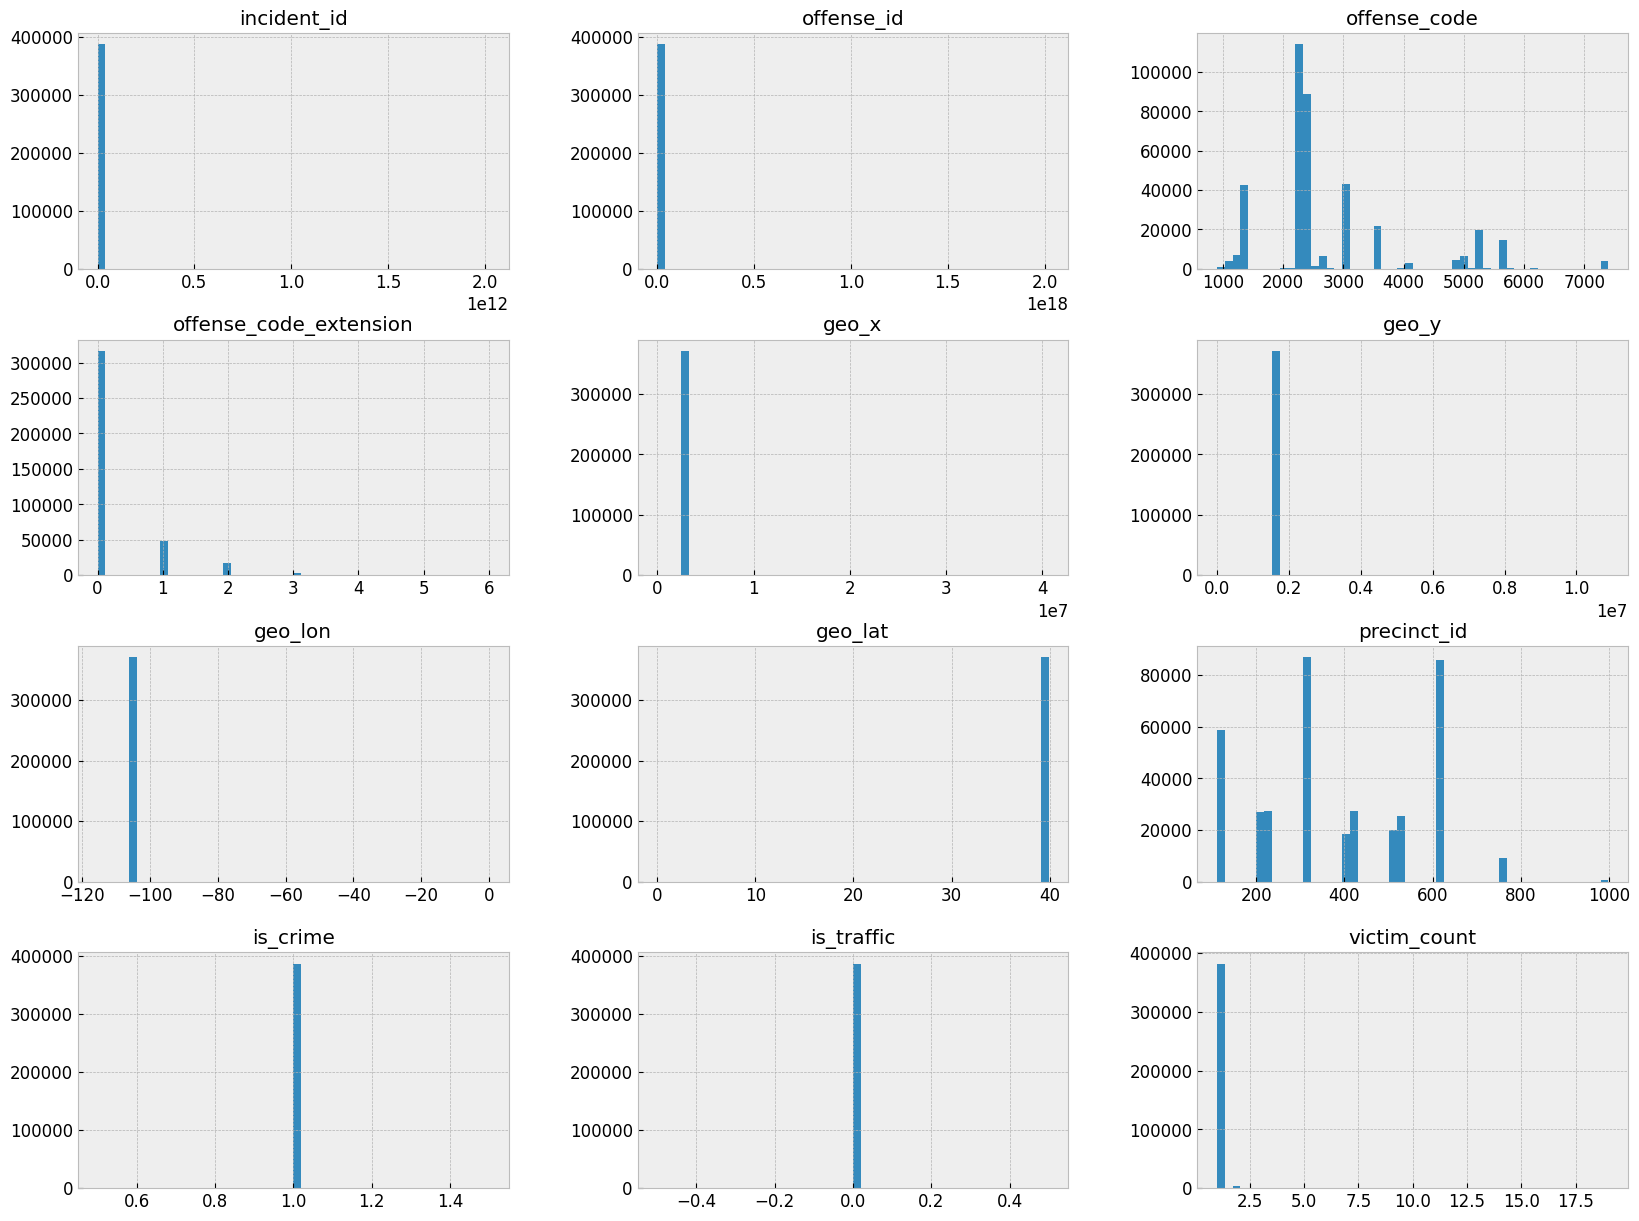

In [38]:
denver_crime_df.hist(figsize=(20,15), bins=50)

array([[<Axes: title={'center': 'STAT_VALUE'}>,
        <Axes: title={'center': 'Row_Value_ID'}>]], dtype=object)

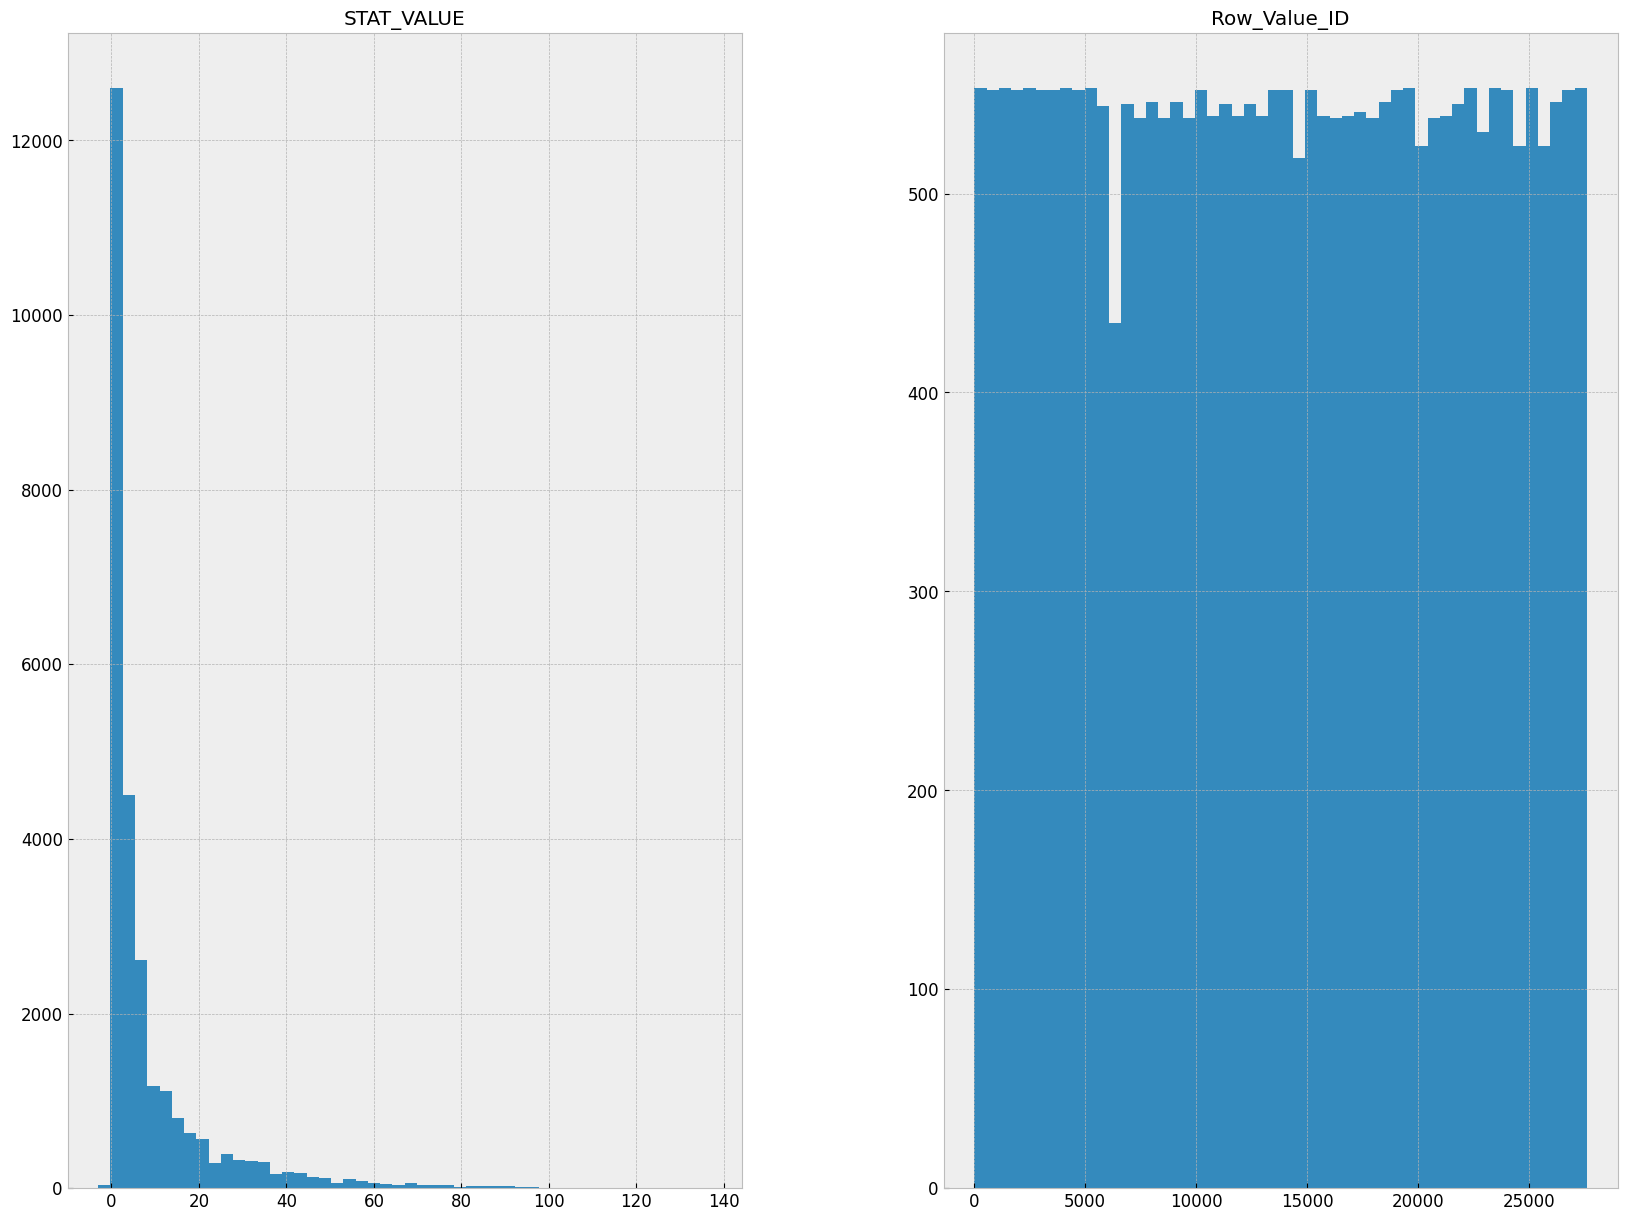

In [39]:
seattle_crime_df.hist(figsize=(20,15), bins=50)

<Axes: >

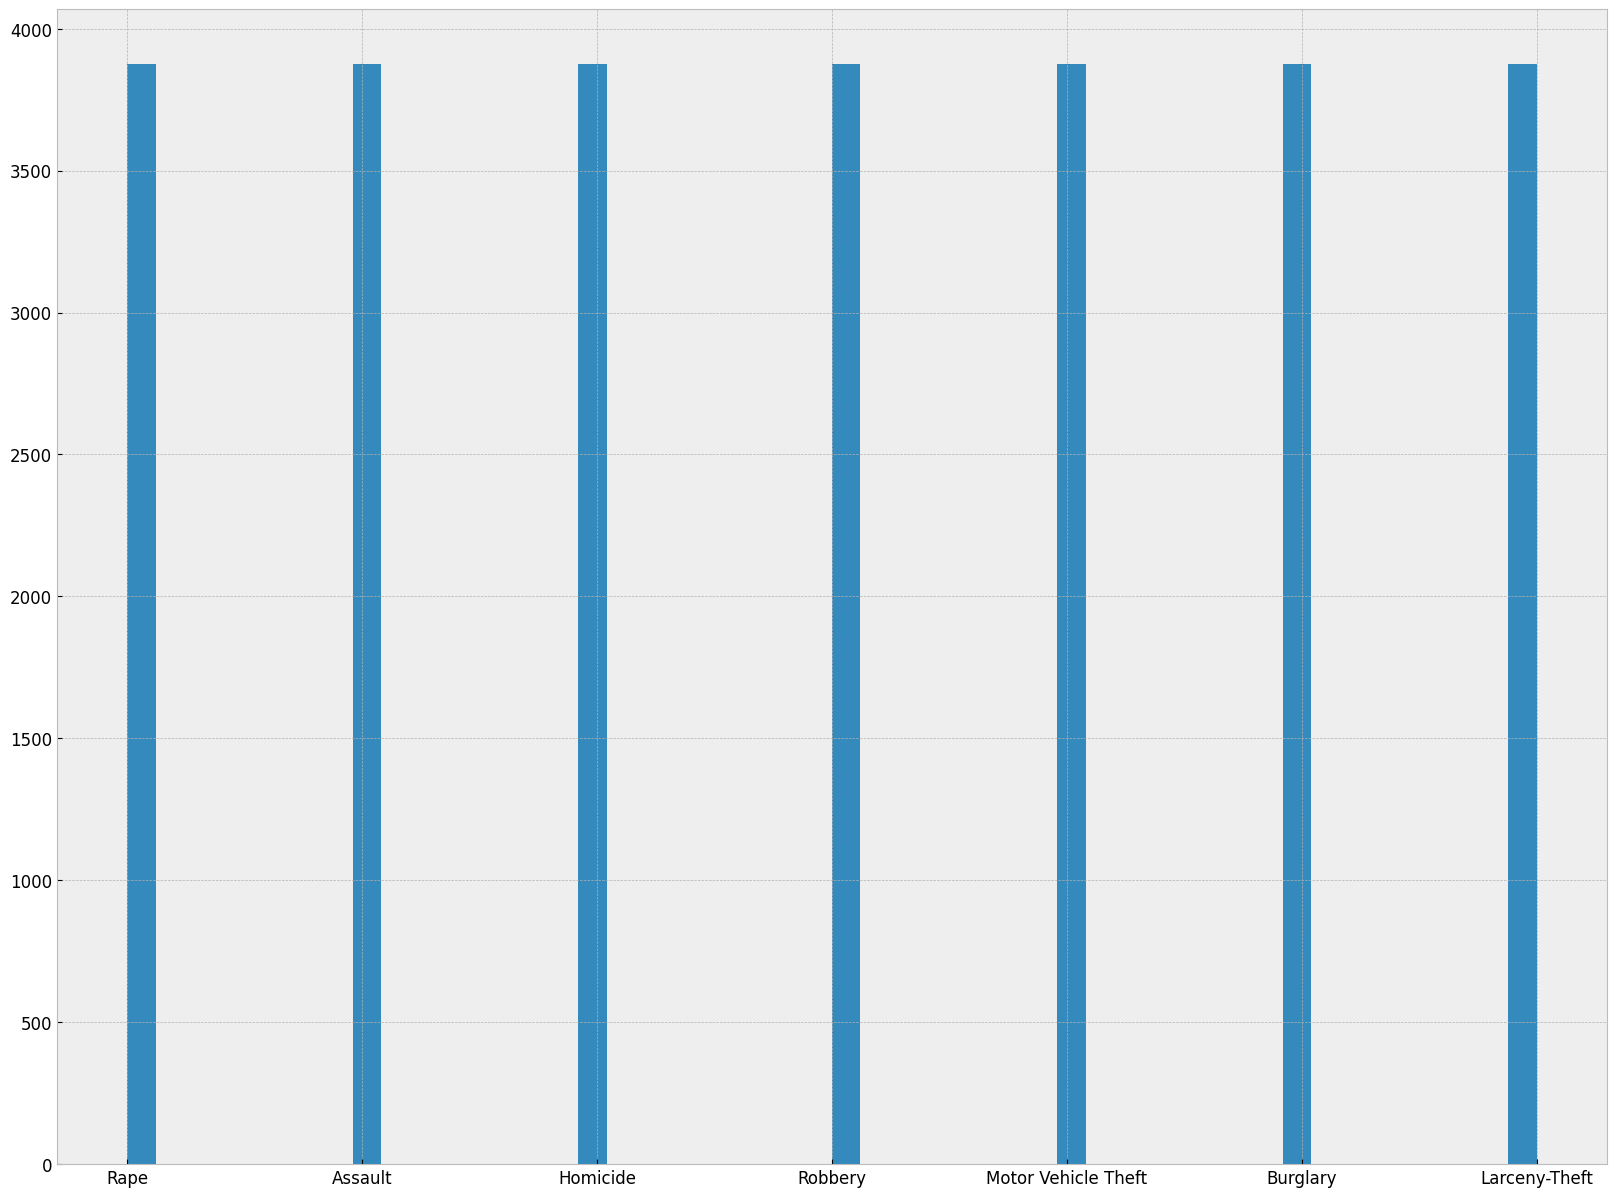

In [40]:
seattle_crime_df['CRIME_TYPE'].hist(figsize=(20,15), bins=50)

<Axes: >

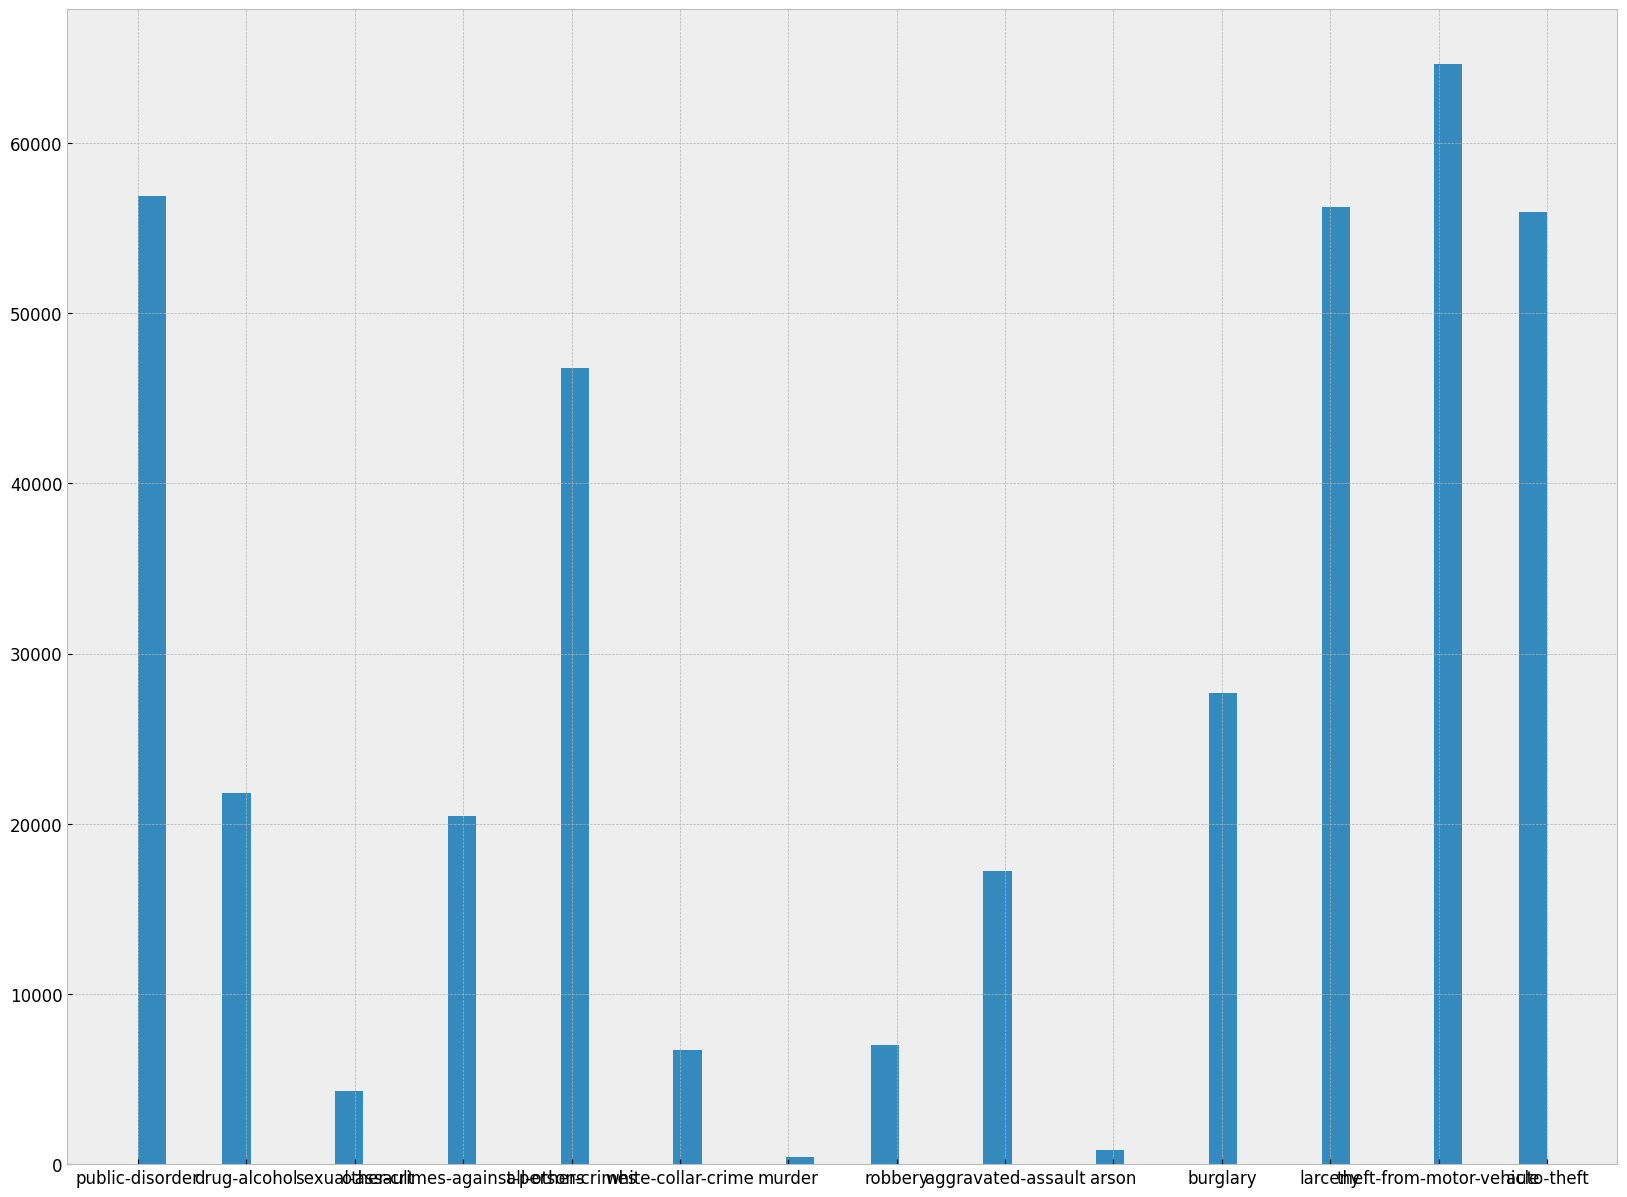

In [41]:
denver_crime_df['offense_category_id'].hist(figsize=(20,15), bins=50)

<Axes: ylabel='offense_category_id'>

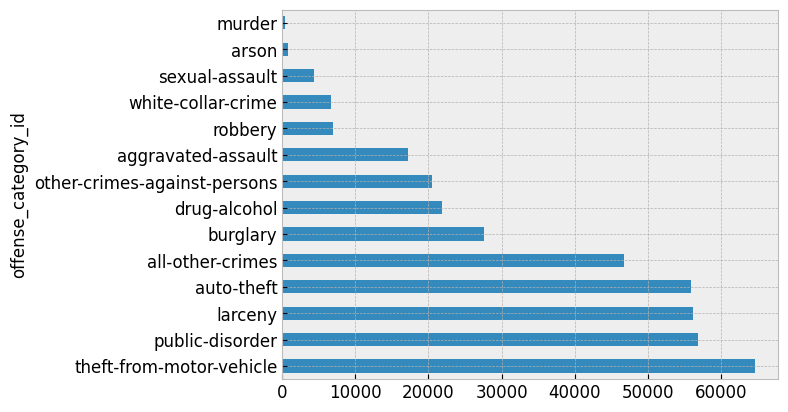

In [42]:
simplified_denver_crime_df = denver_crime_df.drop(['incident_id','offense_id','offense_code','offense_code_extension','first_occurrence_date',
                                                 'last_occurrence_date','incident_address','geo_x','geo_y','geo_lon','geo_lat','district_id',
                                                 'precinct_id','neighborhood_id','is_crime','is_traffic','victim_count'], axis=1)

simplified_denver_crime_df['offense_category_id'].value_counts().plot(kind='barh')

array([[<Axes: xlabel='STAT_VALUE', ylabel='STAT_VALUE'>,
        <Axes: xlabel='Row_Value_ID', ylabel='STAT_VALUE'>],
       [<Axes: xlabel='STAT_VALUE', ylabel='Row_Value_ID'>,
        <Axes: xlabel='Row_Value_ID', ylabel='Row_Value_ID'>]],
      dtype=object)

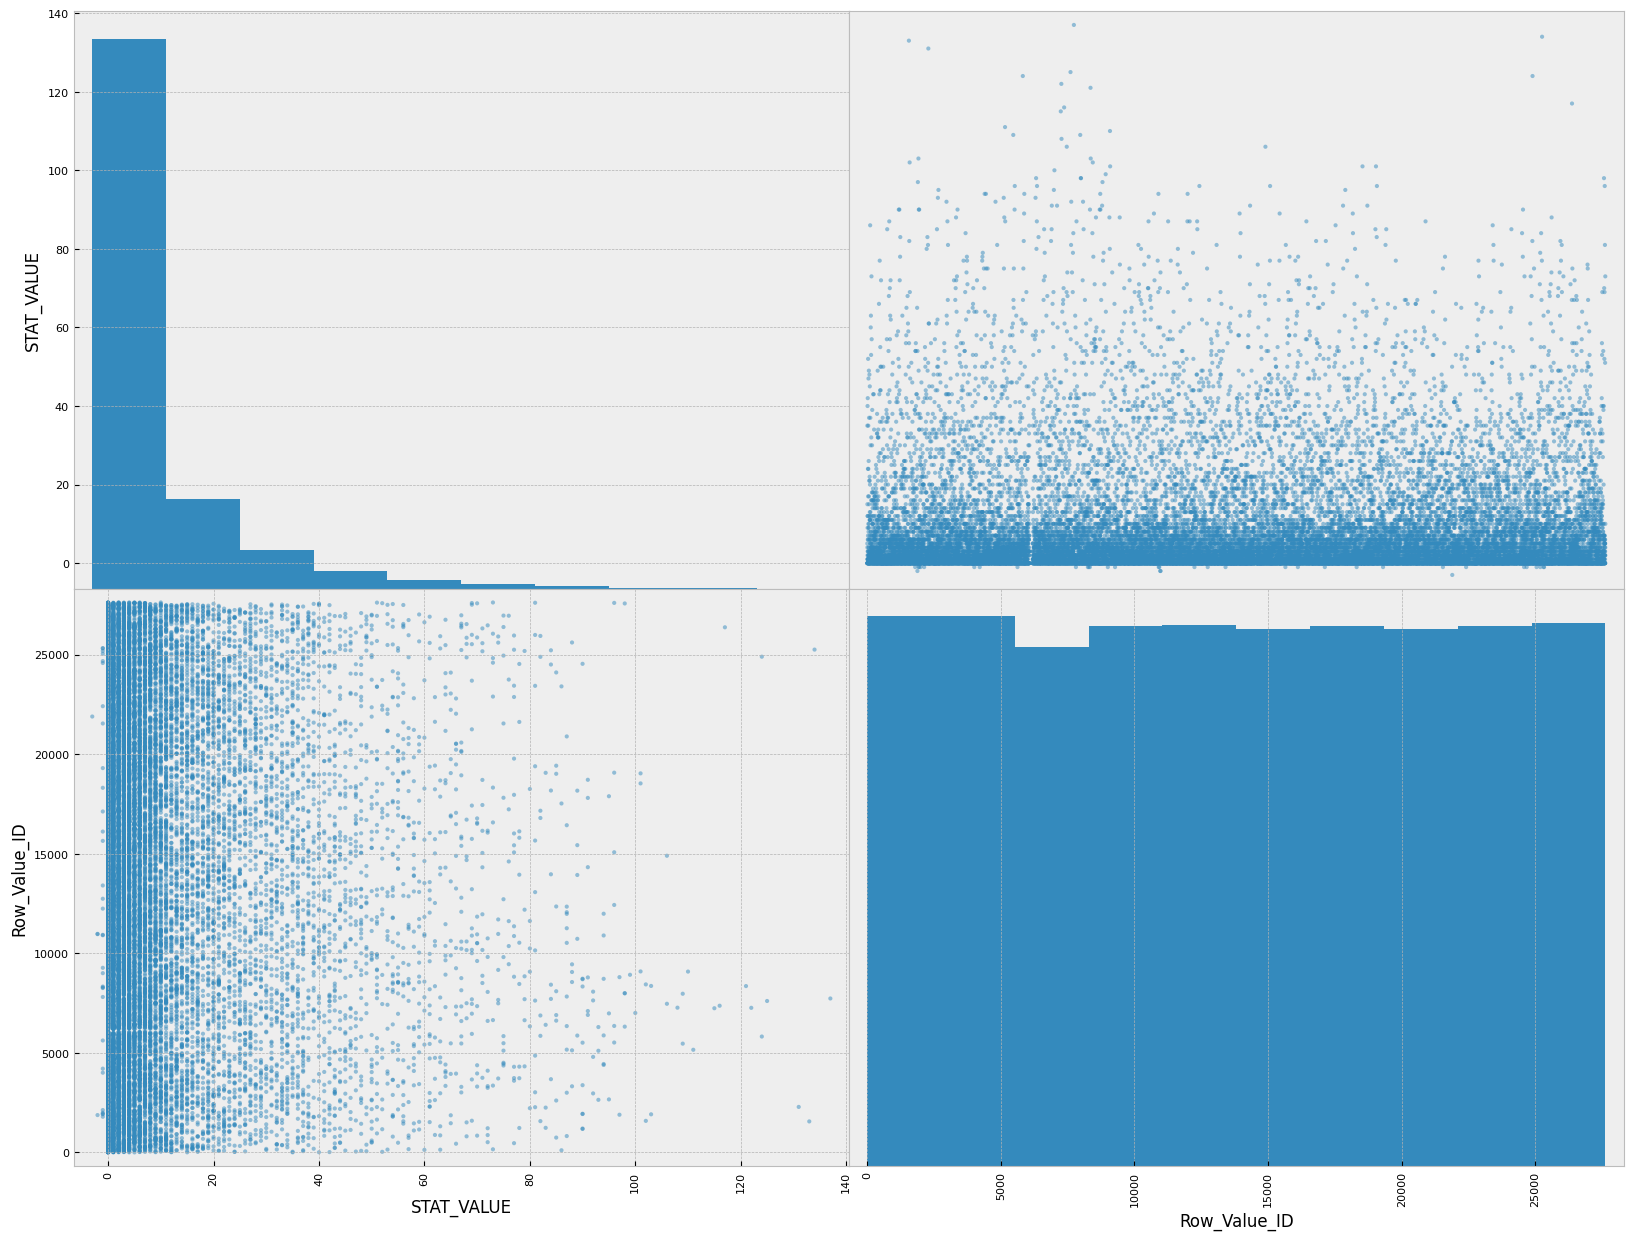

In [43]:
seattle_scatter_mat = pd.plotting.scatter_matrix(seattle_crime_df, figsize=(20,15))
seattle_scatter_mat

<Axes: ylabel='CRIME_TYPE'>

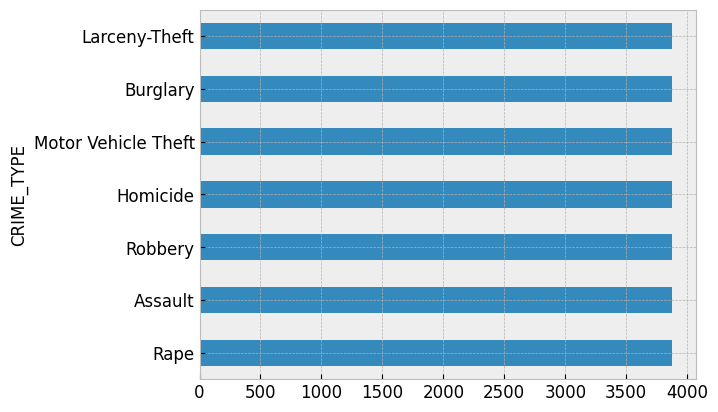

In [44]:
seattle_crime_df['CRIME_TYPE'].value_counts().plot(kind='barh')

### First Impressions/Conclusions
Scatter Matrixes were not particularly helpful. I see that the primary data I want is the total crime type by year. I will need to eliminate unneeded columns and so some data transformation to make the sets more useful. I have trimmed down known extraneous columns from denver just reduce the load on the data viz libraries. I will refine further during the next phase.

## Machine Learning and Regression
### Data transformation
I will add a column to each dataset exclusively for the year of the offense. This should allow me to observe the rate of change, if any, for each type year over year. The datasets have different categories of crimes that do not necessarily correspond to each other. However, I do not see this necessarily as a hindrance as the real intent is to see if there are any changes in the respective categories.

In [48]:
# Transform Denver data
simplified_denver_crime_df['reported_datetime'] = pd.to_datetime(simplified_denver_crime_df['reported_date'])
simplified_denver_crime_df.head()
simplified_denver_crime_df['year'] = simplified_denver_crime_df['reported_datetime'].dt.year
simplified_denver_crime_df.head()

,offense_type_id,offense_category_id,reported_date,reported_datetime,year
0,criminal-mischief-other,public-disorder,2/10/2022 3:16:00 AM,2022-02-10 03:16:00,2022
1,criminal-mischief-other,public-disorder,7/8/2021 12:55:00 AM,2021-07-08 00:55:00,2021
2,criminal-mischief-other,public-disorder,10/29/2020 4:31:00 AM,2020-10-29 04:31:00,2020
3,criminal-mischief-other,public-disorder,9/7/2018 9:58:00 AM,2018-09-07 09:58:00,2018
4,criminal-mischief-other,public-disorder,5/13/2020 10:00:00 AM,2020-05-13 10:00:00,2020


In [51]:
seattle_crime_df['REPORT_DATETIME'] = pd.to_datetime(seattle_crime_df['REPORT_DATE'])
seattle_crime_df.head()
seattle_crime_df['YEAR'] = seattle_crime_df['REPORT_DATETIME'].dt.year
seattle_crime_df.head()

/var/folders/cd/phnyf8nx3qz3q_40w5wr7jxm0000gn/T/ipykernel_5452/2850948777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seattle_crime_df['REPORT_DATETIME'] = pd.to_datetime(seattle_crime_df['REPORT_DATE'])
/var/folders/cd/phnyf8nx3qz3q_40w5wr7jxm0000gn/T/ipykernel_5452/2850948777.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seattle_crime_df['YEAR'] = seattle_crime_df['REPORT_DATETIME'].dt.year


,Police Beat,CRIME_TYPE,CRIME_DESCRIPTION,STAT_VALUE,REPORT_DATE,Sector,Precinct,Row_Value_ID,REPORT_DATETIME,YEAR
0,R2,Rape,Rape,1,2014-04-30T00:00:00.000,R,SE,27092,2014-04-30,2014
1,K2,Assault,Assault,5,2014-04-30T00:00:00.000,K,W,26506,2014-04-30,2014
2,M2,Homicide,Homicide,1,2014-04-30T00:00:00.000,M,W,27567,2014-04-30,2014
3,C3,Robbery,Robbery,2,2014-04-30T00:00:00.000,C,E,26225,2014-04-30,2014
4,E2,Motor Vehicle Theft,"Vehicle Theft is theft of a car, truck, motorc...",7,2014-04-30T00:00:00.000,E,E,26368,2014-04-30,2014


### Remove all superflous columns
Remove unnecessary columns from the datasets to maximize focus on important data.

In [55]:
denver_crime_df_v2 = simplified_denver_crime_df.drop(['offense_type_id', 'reported_date',
       'reported_datetime'], axis=1)
denver_crime_df_v2.head()

,offense_category_id,year
0,public-disorder,2022
1,public-disorder,2021
2,public-disorder,2020
3,public-disorder,2018
4,public-disorder,2020


In [57]:
seattle_crime_df_v2 = seattle_crime_df.drop(['Police Beat', 'CRIME_DESCRIPTION', 'STAT_VALUE', 'REPORT_DATE',
                                             'Sector', 'Precinct', 'Row_Value_ID', 'REPORT_DATETIME'] , axis=1)
seattle_crime_df_v2.head()

,CRIME_TYPE,YEAR
0,Rape,2014
1,Assault,2014
2,Homicide,2014
3,Robbery,2014
4,Motor Vehicle Theft,2014


## Resources and References
*What resources and references have you used for this project?*
I used Kaggle to source the datasets

In [46]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 6523 bytes to source.py
